## Imports
There are just a few imports for this analysis, but this version will deviate from the Soccermatics approach due to the mplsoccer library throwing and error when making a call to Statsbomb.  Instead, the statsbomb data will be called directly for the dataframe.

In [1]:
import matplotlib.pyplot as plt
import numpy as np
from mplsoccer import Pitch, Sbopen, VerticalPitch
from statsbombpy import sb

## Opening the dataset
Using the sb parser in place of SBopen in mplsoccer the event data is pulled out. Calling on the event level data and inputting the id of the game as a parameter loads the game data. The event data is stored in a dataframe df. From this dataframe take out the names of the two teams. Then, filter the dataframe so that only shots are left in the events.

In [2]:
# get event data
event_lib = sb.events(match_id=69301, split=True, flatten_attrs=False)
event_lib.keys()

dict_keys(['starting_xis', 'half_starts', 'passes', 'ball_receipts', 'carrys', 'pressures', 'ball_recoverys', 'clearances', 'blocks', 'dispossesseds', 'duels', 'dribbled_pasts', 'dribbles', 'interceptions', 'goal_keepers', 'miscontrols', 'foul_committeds', 'foul_wons', 'injury_stoppages', 'errors', 'shots', 'substitutions', 'half_ends', 'tactical_shifts', 'bad_behaviours'])

In [3]:
shots = event_lib['shots']
shots.iloc[0]['shot']['outcome']['name']

'Goal'

In [4]:
#get team names
team1, team2 = shots.possession_team.unique()
print(team1, team2)

Sweden Women's England Women's


In [5]:
shots_id = (shots.set_index('id'))

## Making the shot map - iterative solution
Draw the pitch using the MPL Soccer class

In this example, set variables for pitch length and width to the Statsbomb coordinate system (yards). Read more details about [different pitch coordinate systems here](https://mplsoccer.readthedocs.io/en/latest/gallery/pitch_setup/plot_compare_pitches.html).

1. After drawing the pitch, iterate through all the shots in the match. 
2. Take the x and y coordinates, the team name and if a goal was scored. 
3. If It was scored, plot a solid circle with the name of the player, if not, plot a transculent circle (parameter alpha tunes the transcluency). 
4. To place England’s shots on one half and Sweden's shots on the other half, subtract x (and y?) from the pitch length and height.

**Note:** Football data tends to be attacking left to right, and we will use this as default in the course.

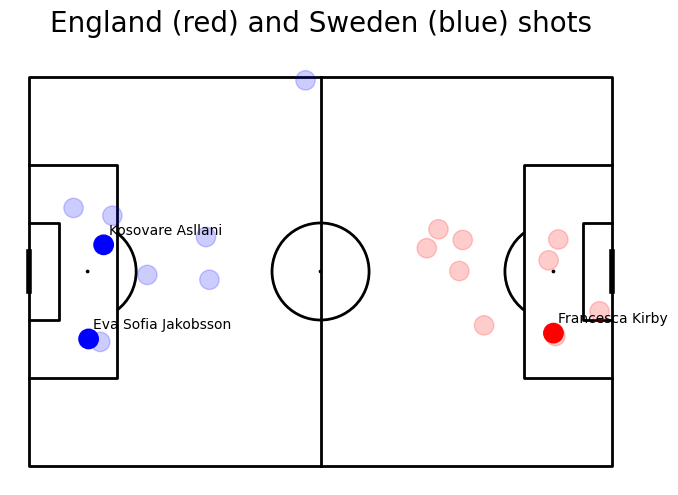

In [6]:
# Plotting tends to create large cells, but will attempt to refractor original where possible
pitch = Pitch(line_color = "black")
fig, ax = pitch.draw(figsize=(10, 5))

#Size of the pitch in yards (!!!)
pitchLengthX = 120
pitchWidthY = 80

#Plot the shots by looping through them.
for i,shot in shots_id.iterrows():
    # get shot information from first record or library of shot information
    x=shot.location[0]
    y=shot.location[1]
    goal=shot.shot['outcome']['name']=='Goal' # library freeze frame
    team_name=shot['possession_team']
    
    #set circlesize
    circleSize=2
    
    #plot England
    if (team_name==team2):
        if goal:
            shotCircle=plt.Circle((x,y),circleSize,color="red")
            plt.text(x+1,y-2,shot['player'])
        else:
            shotCircle=plt.Circle((x,y),circleSize,color="red")
            shotCircle.set_alpha(.2)
    #plot Sweden
    else:
        if goal:
            shotCircle=plt.Circle((pitchLengthX-x,pitchWidthY - y),circleSize,color="blue")
            plt.text(pitchLengthX-x+1,pitchWidthY - y - 2 ,shot['player'])
        else:
            shotCircle=plt.Circle((pitchLengthX-x,pitchWidthY - y),circleSize,color="blue")
            shotCircle.set_alpha(.2)
    ax.add_patch(shotCircle)
#set title
fig.suptitle("England (red) and Sweden (blue) shots", fontsize = 20)
fig.set_size_inches(10, 5)
plt.show()